In [1]:

import os
from torchvision.transforms import Compose, Resize, InterpolationMode, ToTensor, Normalize, RandomCrop, RandomHorizontalFlip
import torch
from torchvision import transforms
from code.classifier import PneumoniaClassifier, Config
import matplotlib.pyplot as plt
import numpy as np



In [2]:

# Load the TensorBoard extension
%reload_ext tensorboard
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [3]:
# Enable CUDA Launch Blocking
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
# Set float32 matrix multiplication precision to 'medium' to utilize Tensor Cores
torch.set_float32_matmul_precision('medium')
torch.serialization.add_safe_globals([Compose, Resize, set, Config, InterpolationMode, ToTensor, Normalize, RandomHorizontalFlip])

In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU')
else:
    print(gpu_info)

Fri Nov 29 19:50:43 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.90                 Driver Version: 565.90         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 Ti   WDDM  |   00000000:02:00.0  On |                  N/A |
|  0%   42C    P8             12W /  285W |    1185MiB /  12282MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
from torchvision import transforms


config = Config(
    backbone_name="resnet18",
    transfer_learning=True,
    learning_rate=1e-4,
    batch_size=20,
    max_epochs=100,
    weight_decay=1e-4,
    dropout=0.5,
    num_workers=31,
    model_name="ResNet18_transfer",
    version="001",
    optimizer_name = "sgd",
    use_class_weights=False,
    image_res=224
)
model = PneumoniaClassifier(config)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [6]:


model.train_model()
torch.save(model.state_dict(), f"../models/{config.model_name}_final.pt")

C:\Users\aszab\miniconda3\envs\pneumonia_detection\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:654: Checkpoint directory C:\Users\aszab\Documents\Studium\Modules\ComputerScienceProject\MedicalImaging\pneumonia_detection\checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\aszab\miniconda3\envs\pneumonia_detection\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(

  | Name              | Type            | Params | Mode 
--------------------------------------------------------------
0 | accuracy          | BinaryAccuracy  | 0      | train
1 | precision         | BinaryPrecision | 0      | train
2 | recall            | BinaryRecall    | 0      | train
3 | f1                | BinaryF1Score   | 0      | train
4 | feature_extractor | Sequential      | 11.2 M | train
5 | dropout           | Dropout         | 0      | 

Epoch 0: 100%|██████████| 205/205 [00:14<00:00, 13.67it/s, v_num=6, train_loss_step=0.616]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 0: 100%|██████████| 205/205 [00:18<00:00, 10.84it/s, v_num=6, train_loss_step=0.616, val_acc_epoch=0.585, val_precision_epoch=0.789, val_recall_epoch=0.588, val_f1_epoch=0.674]

Metric val_loss improved. New best score: 0.528


Epoch 1: 100%|██████████| 205/205 [00:14<00:00, 14.26it/s, v_num=6, train_loss_step=0.541, val_acc_epoch=0.585, val_precision_epoch=0.789, val_recall_epoch=0.588, val_f1_epoch=0.674]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 1: 100%|██████████| 205/205 [00:18<00:00, 11.35it/s, v_num=6, train_loss_step=0.541, val_acc_epoch=0.688, val_precision_epoch=0.856, val_recall_epoch=0.689, val_f1_epoch=0.763]

Metric val_loss improved by 0.078 >= min_delta = 0.0. New best score: 0.450


Epoch 2: 100%|██████████| 205/205 [00:13<00:00, 14.88it/s, v_num=6, train_loss_step=0.627, val_acc_epoch=0.688, val_precision_epoch=0.856, val_recall_epoch=0.689, val_f1_epoch=0.763]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 2: 100%|██████████| 205/205 [00:17<00:00, 11.58it/s, v_num=6, train_loss_step=0.627, val_acc_epoch=0.746, val_precision_epoch=0.880, val_recall_epoch=0.754, val_f1_epoch=0.812]

Metric val_loss improved by 0.059 >= min_delta = 0.0. New best score: 0.390


Epoch 3: 100%|██████████| 205/205 [00:13<00:00, 14.70it/s, v_num=6, train_loss_step=0.461, val_acc_epoch=0.746, val_precision_epoch=0.880, val_recall_epoch=0.754, val_f1_epoch=0.812]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 205/205 [00:14<00:00, 14.37it/s, v_num=6, train_loss_step=0.610, val_acc_epoch=0.769, val_precision_epoch=0.896, val_recall_epoch=0.773, val_f1_epoch=0.830]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 205/205 [00:18<00:00, 11.36it/s, v_num=6, train_loss_step=0.610, val_acc_epoch=0.786, val_precision_epoch=0.912, val_recall_epoch=0.782, val_f1_epoch=0.842]

Metric val_loss improved by 0.032 >= min_delta = 0.0. New best score: 0.359


Epoch 5: 100%|██████████| 205/205 [00:14<00:00, 14.33it/s, v_num=6, train_loss_step=0.379, val_acc_epoch=0.786, val_precision_epoch=0.912, val_recall_epoch=0.782, val_f1_epoch=0.842]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 5: 100%|██████████| 205/205 [00:18<00:00, 11.31it/s, v_num=6, train_loss_step=0.379, val_acc_epoch=0.798, val_precision_epoch=0.909, val_recall_epoch=0.803, val_f1_epoch=0.853]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.353


Epoch 6: 100%|██████████| 205/205 [00:14<00:00, 14.28it/s, v_num=6, train_loss_step=0.433, val_acc_epoch=0.798, val_precision_epoch=0.909, val_recall_epoch=0.803, val_f1_epoch=0.853]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 6: 100%|██████████| 205/205 [00:18<00:00, 11.11it/s, v_num=6, train_loss_step=0.433, val_acc_epoch=0.804, val_precision_epoch=0.918, val_recall_epoch=0.803, val_f1_epoch=0.857]

Metric val_loss improved by 0.028 >= min_delta = 0.0. New best score: 0.325


Epoch 7: 100%|██████████| 205/205 [00:13<00:00, 15.30it/s, v_num=6, train_loss_step=0.460, val_acc_epoch=0.804, val_precision_epoch=0.918, val_recall_epoch=0.803, val_f1_epoch=0.857]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 7: 100%|██████████| 205/205 [00:17<00:00, 11.94it/s, v_num=6, train_loss_step=0.460, val_acc_epoch=0.815, val_precision_epoch=0.917, val_recall_epoch=0.821, val_f1_epoch=0.867]

Metric val_loss improved by 0.031 >= min_delta = 0.0. New best score: 0.294


Epoch 8: 100%|██████████| 205/205 [00:14<00:00, 14.40it/s, v_num=6, train_loss_step=0.438, val_acc_epoch=0.815, val_precision_epoch=0.917, val_recall_epoch=0.821, val_f1_epoch=0.867]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 9: 100%|██████████| 205/205 [00:13<00:00, 15.54it/s, v_num=6, train_loss_step=0.667, val_acc_epoch=0.811, val_precision_epoch=0.917, val_recall_epoch=0.814, val_f1_epoch=0.863]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 10: 100%|██████████| 205/205 [00:14<00:00, 13.83it/s, v_num=6, train_loss_step=0.282, val_acc_epoch=0.812, val_precision_epoch=0.921, val_recall_epoch=0.812, val_f1_epoch=0.863]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 10: 100%|██████████| 205/205 [00:18<00:00, 11.04it/s, v_num=6, train_loss_step=0.282, val_acc_epoch=0.821, val_precision_epoch=0.925, val_recall_epoch=0.822, val_f1_epoch=0.870]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.294. Signaling Trainer to stop.


Epoch 10: 100%|██████████| 205/205 [00:18<00:00, 11.04it/s, v_num=6, train_loss_step=0.282, val_acc_epoch=0.821, val_precision_epoch=0.925, val_recall_epoch=0.822, val_f1_epoch=0.870]


In [7]:
# Testing
print("Testing the models...")
checkpoint_path = "../checkpoints/ResNet18_transfer.ckpt"
test_metadata = model.test_model(checkpoint_path)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing the models...
Testing DataLoader 0: 100%|██████████| 44/44 [00:05<00:00,  7.63it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_acc_epoch         0.8907849788665771
      test_acc_step         0.9224035143852234
      test_f1_epoch         0.9205297827720642
      test_f1_step          0.6584423184394836
        test_loss           0.31112655997276306
  test_precision_epoch      0.9805996417999268
   test_precision_step      0.6833458542823792
    test_recall_epoch       0.8673946857452393
    test_recall_step        0.6521193385124207
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [8]:
# Initialize the models
#models = PneumoniaClassifier(config, transform)
# Test the models
#metadata = models.test_model(f"../checkpoints/{config.model_name}.ckpt")
#model = torch.load(f"../models/{config.model_name}.pt")
#model.eval()
#model.test_model()
#
## Print the metadata
#print(metadata)

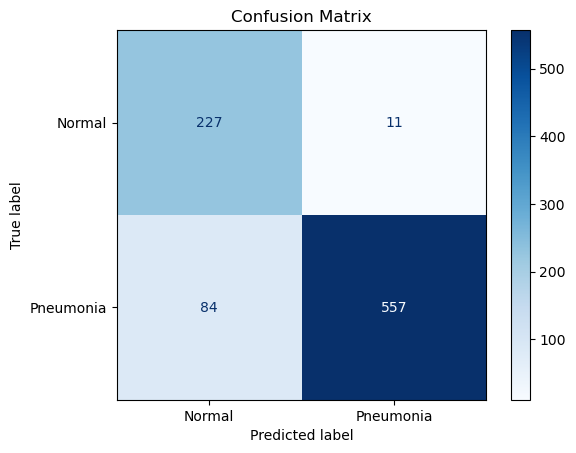

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, dataloader, class_names):
    all_preds = []
    all_labels = []

    # Get predictions and true labels
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()
    with torch.no_grad():
        for data, labels in dataloader:
            data = data.cuda()  # Move data to GPU if available
            labels = labels.cuda()
            preds = torch.argmax(model(data), dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

# Call this after training/testing
plot_confusion_matrix(model, model.test_loader, class_names=["Normal", "Pneumonia"])

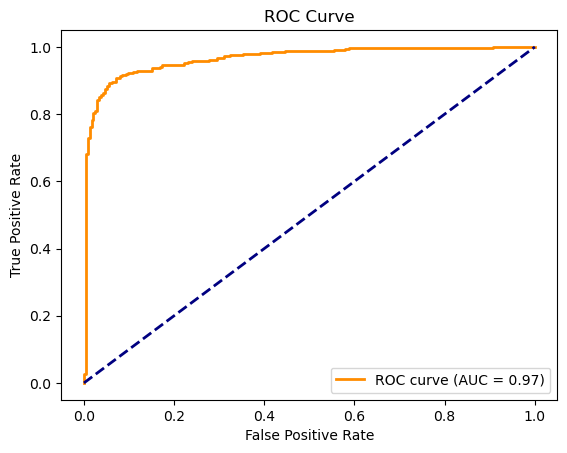

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_auc(model, dataloader):
    all_preds = []
    all_labels = []

    # Get predictions and true labels
    model.eval()
    with torch.no_grad():
        for data, labels in dataloader:
            data = data.cuda()
            labels = labels.cuda()
            preds = model(data)
            probs = torch.softmax(preds, dim=1)[:, 1]  # Probabilities for class 1
            all_preds.extend(probs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(all_labels, all_preds)
    auc = roc_auc_score(all_labels, all_preds)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Call this after training/testing
plot_roc_auc(model, model.test_loader)

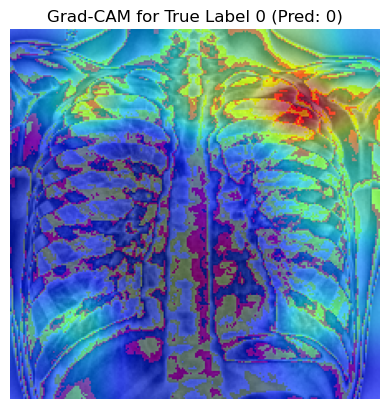

IndexError: list index out of range

In [12]:
from torchcam.methods import SmoothGradCAMpp
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt

def visualize_gradcam(model, dataloader, target_layer="feature_extractor.8"):
    model.eval()  # Set the models to evaluation mode
    for param in model.parameters():
        param.requires_grad = True

    # Initialize Grad-CAM with the target layer
    cam_extractor = SmoothGradCAMpp(model, target_layer=target_layer)

    # Pick one batch from the dataloader
    data, labels = next(iter(dataloader))
    data = data.cuda()
    labels = labels.cuda()

    # Forward pass through the models
    preds = model(data)

    # Iterate through the batch to visualize Grad-CAM for each image
    for i in range(len(data)):
        # Predicted class index for the current image
        class_idx = preds[i].argmax(dim=0).item()

        # Generate CAM for the predicted class
        cam = cam_extractor(class_idx, preds)

        # Check the type and shape of the cam
        if isinstance(cam, list):
            # Assuming the CAM for each image is in cam[i]
            heatmap = cam[i]
        elif isinstance(cam, dict):
            # Retrieve the heatmap for the specified layer
            heatmap = cam[target_layer][i]
        else:
            raise TypeError(f"Unexpected cam type: {type(cam)}")

        # Ensure the heatmap is reduced to one channel
        if heatmap.dim() == 3:  # If heatmap has multiple channels, reduce to one
            heatmap = heatmap.mean(dim=0)  # Average across channels

        # Convert the image and heatmap to PIL images
        original_image = to_pil_image(data[i].cpu())
        heatmap_image = to_pil_image(heatmap, mode="F")

        # Overlay heatmap on the original image
        result = overlay_mask(original_image, heatmap_image, alpha=0.5)
        plt.imshow(result)
        plt.title(f"Grad-CAM for True Label {labels[i].item()} (Pred: {class_idx})")
        plt.axis("off")
        plt.show()

# Call this function after training
visualize_gradcam(model, model.test_loader, target_layer="feature_extractor.7")
